# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

# Input Data

In [2]:
data = pd.read_csv('/content/Big Project Progres Data_Kelompok 7 (2).csv')
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,1,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.9,44,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,45,1,1,1,1,255,low
1057,6.6,39,1,0,1,0,250,high


# Check Missing Value

In [3]:
# untuk melihat apakah terdapat missing value pada data, dapat kita gunakan syntax sebagai berikut
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Lemak         0
Turbidity     0
Colour        0
Grade         0
dtype: int64

# Information Of Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Lemak       1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


# Deskripsi statistik data

In [5]:
deskripsi_statistik = data[['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Lemak ']].describe()
deskripsi_statistik

,pH,Temprature,Taste,Odor,Turbidity,Lemak
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.501416,46.555241,0.543909,0.425873,0.485364,0.666667
std,1.345773,11.066628,0.498304,0.494708,0.500022,0.471627
min,3.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,5.900000,38.000000,0.000000,0.000000,0.000000,0.000000
50%,6.600000,44.000000,1.000000,0.000000,0.000000,1.000000
75%,6.900000,52.000000,1.000000,1.000000,1.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cols_to_map = ['Taste', 'Odor', 'Turbidity','Lemak ']

# Lakukan pemetaan dan simpan perubahan langsung ke dalam DataFrame
data[cols_to_map] = data[cols_to_map].replace({0: 'Bad', 1: 'Good'})
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,254,high
1,6.6,36,Bad,Good,Bad,Good,253,high
2,8.5,70,Good,Good,Good,Good,246,low
3,9.5,34,Good,Good,Good,Good,255,low
4,6.6,37,Bad,Bad,Bad,Bad,255,medium
...,...,...,...,...,...,...,...,...
1054,6.9,44,Good,Good,Bad,Bad,247,medium
1055,6.7,38,Good,Bad,Good,Bad,255,high
1056,3.0,45,Good,Good,Good,Good,255,low
1057,6.6,39,Good,Bad,Good,Bad,250,high


In [7]:
cols_to_map = ['Colour']
# Lakukan pemetaan dan simpan perubahan langsung ke dalam DataFrame
data[cols_to_map] = data[cols_to_map].replace({254:'Alice Blue', 253:'Oldlace', 246:'Wildsand', 255:'White', 250:'Snow', 247:'grey', 245:'Whitesmoke', 240:'Honeydew', 248:'Ghost White'})
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,Alice Blue,high
1,6.6,36,Bad,Good,Bad,Good,Oldlace,high
2,8.5,70,Good,Good,Good,Good,Wildsand,low
3,9.5,34,Good,Good,Good,Good,White,low
4,6.6,37,Bad,Bad,Bad,Bad,White,medium
...,...,...,...,...,...,...,...,...
1054,6.9,44,Good,Good,Bad,Bad,grey,medium
1055,6.7,38,Good,Bad,Good,Bad,White,high
1056,3.0,45,Good,Good,Good,Good,White,low
1057,6.6,39,Good,Bad,Good,Bad,Snow,high


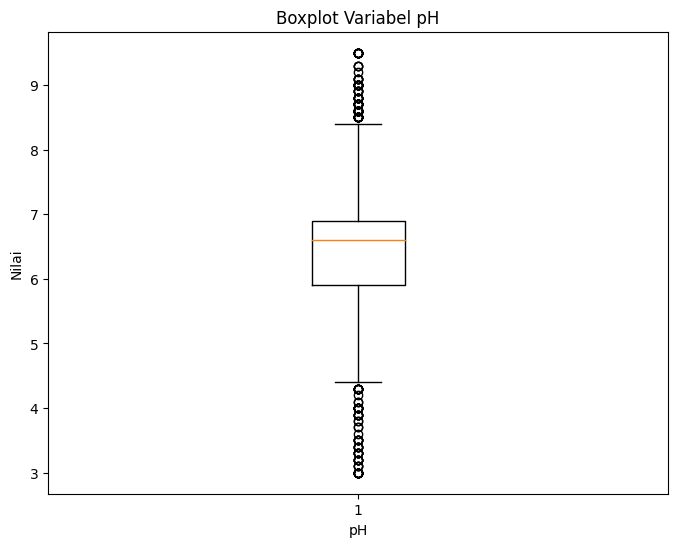

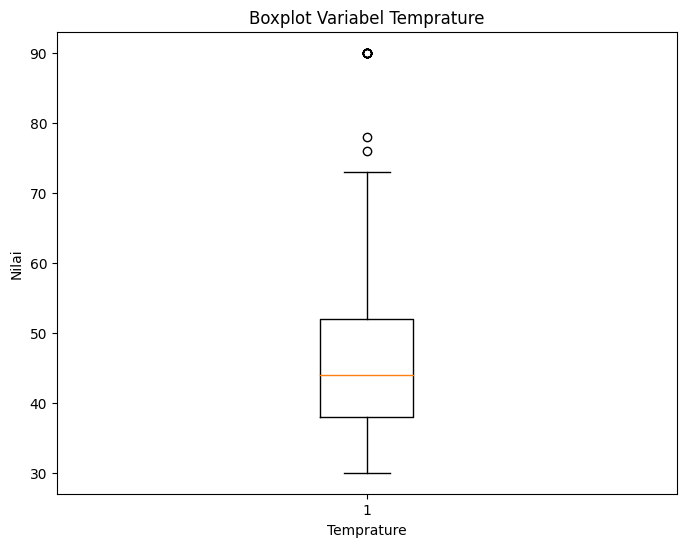

In [8]:
# boxplot pH
plt.figure(figsize=(8, 6))
plt.boxplot(data['pH'])
plt.title('Boxplot Variabel pH')
plt.ylabel('Nilai')
plt.xlabel('pH')
plt.show()

# boxplot Temprature
plt.figure(figsize=(8, 6))
plt.boxplot(data['Temprature'])
plt.title('Boxplot Variabel Temprature')
plt.ylabel('Nilai')
plt.xlabel('Temprature')
plt.show()

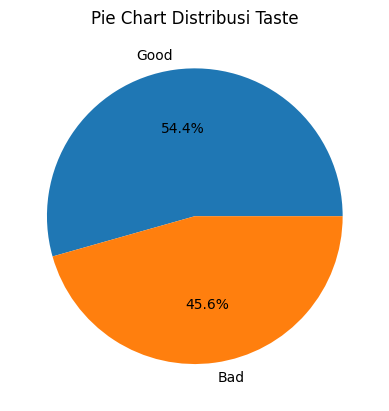

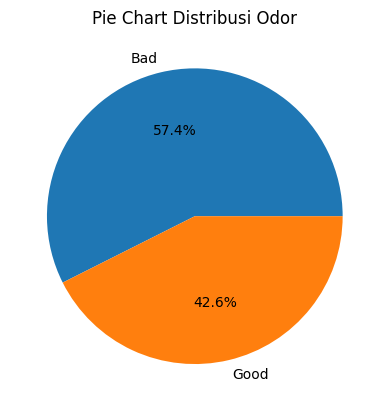

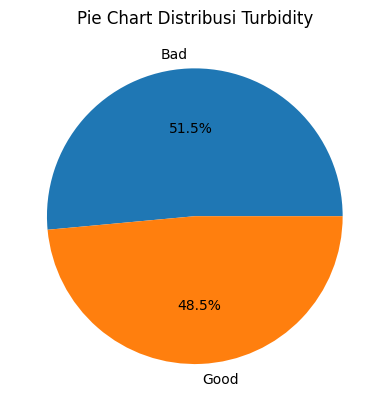

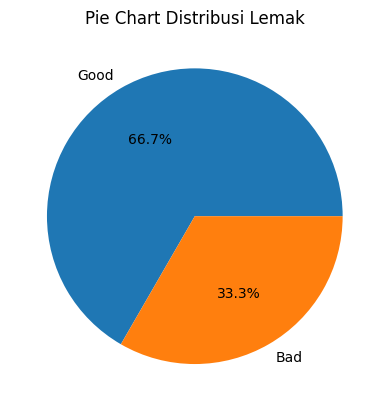

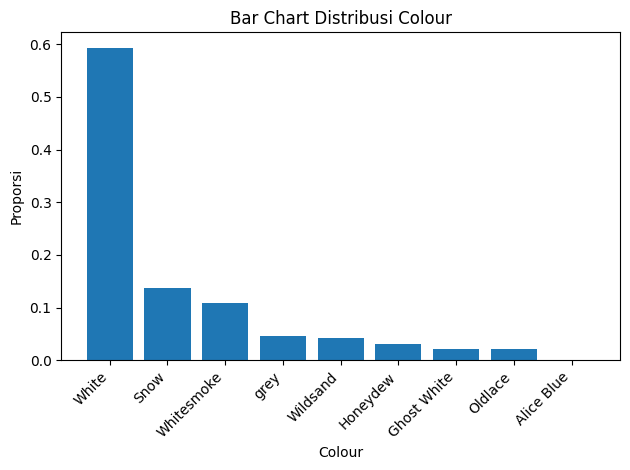

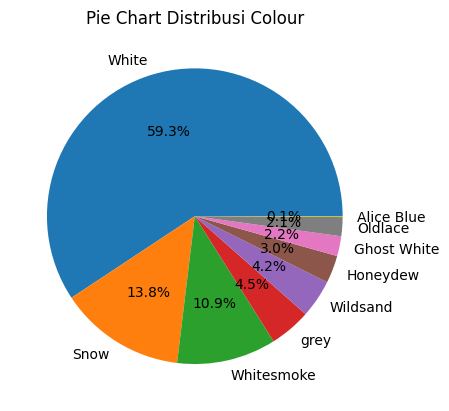

In [9]:
# Menghitung proporsi setiap nilai "Taste"
proporsi = data["Taste"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Taste"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Taste")
plt.show()



# Menghitung proporsi setiap nilai "Odor"
proporsi = data["Odor"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "odor"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Odor")
plt.show()



# Menghitung proporsi setiap nilai "Turbidity"
proporsi = data["Turbidity"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Turbidity"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Turbidity")
plt.show()



# Menghitung proporsi setiap nilai "Lemak"
proporsi = data["Lemak "].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Lemak"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Lemak")
plt.show()


# Menghitung proporsi setiap nilai "Colour"
proporsi = data["Colour"].value_counts(normalize=True)

# Membuat bar chart untuk variabel "Colour"
plt.bar(proporsi.index, proporsi.values)
plt.title("Bar Chart Distribusi Colour")
plt.xlabel("Colour")  # Label sumbu x
plt.ylabel("Proporsi")

# Mengatur label sumbu x menjadi miring dengan jarak yang cukup
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Mengatur layout agar tidak ada tumpang tindih

plt.show()


# Menghitung proporsi setiap nilai "Colour"
proporsi = data["Colour"].value_counts(normalize=True)

# Membuat pie chart untuk variabel "Colour"
plt.pie(proporsi, labels=proporsi.index, autopct="%1.1f%%")
plt.title("Pie Chart Distribusi Colour")
plt.show()


In [10]:
# Deskripsi statistik data
deskripsi_statistik = data.describe()
deskripsi_statistik

,pH,Temprature
count,1059.000000,1059.000000
mean,6.501416,46.555241
std,1.345773,11.066628
min,3.000000,30.000000
25%,5.900000,38.000000
50%,6.600000,44.000000
75%,6.900000,52.000000
max,9.500000,90.000000


In [11]:
# Memeriksa total duplikat data pada tiap variabel
duplicate_counts = data.duplicated().sum()

# Menampilkan total duplikat data pada tiap variabel
print("Total duplikat data pada tiap variabel:")
print(duplicate_counts)

Total duplikat data pada tiap variabel:
376


In [12]:
data.drop_duplicates(inplace=True)
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,Alice Blue,high
1,6.6,36,Bad,Good,Bad,Good,Oldlace,high
2,8.5,70,Good,Good,Good,Good,Wildsand,low
3,9.5,34,Good,Good,Good,Good,White,low
4,6.6,37,Bad,Bad,Bad,Bad,White,medium
...,...,...,...,...,...,...,...,...
1052,6.6,40,Good,Bad,Bad,Bad,Snow,medium
1054,6.9,44,Good,Good,Bad,Bad,grey,medium
1056,3.0,45,Good,Good,Good,Good,White,low
1057,6.6,39,Good,Bad,Good,Bad,Snow,high


In [13]:
le = LabelEncoder()
data['Grade']=le.fit_transform(data['Grade'])
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,Good,Bad,Good,Bad,Alice Blue,0
1,6.6,36,Bad,Good,Bad,Good,Oldlace,0
2,8.5,70,Good,Good,Good,Good,Wildsand,1
3,9.5,34,Good,Good,Good,Good,White,1
4,6.6,37,Bad,Bad,Bad,Bad,White,2
...,...,...,...,...,...,...,...,...
1052,6.6,40,Good,Bad,Bad,Bad,Snow,2
1054,6.9,44,Good,Good,Bad,Bad,grey,2
1056,3.0,45,Good,Good,Good,Good,White,1
1057,6.6,39,Good,Bad,Good,Bad,Snow,0


In [14]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Lemak ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [15]:
data['Taste']=le.fit_transform(data['Taste'])
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,1,Bad,Good,Bad,Alice Blue,0
1,6.6,36,0,Good,Bad,Good,Oldlace,0
2,8.5,70,1,Good,Good,Good,Wildsand,1
3,9.5,34,1,Good,Good,Good,White,1
4,6.6,37,0,Bad,Bad,Bad,White,2
...,...,...,...,...,...,...,...,...
1052,6.6,40,1,Bad,Bad,Bad,Snow,2
1054,6.9,44,1,Good,Bad,Bad,grey,2
1056,3.0,45,1,Good,Good,Good,White,1
1057,6.6,39,1,Bad,Good,Bad,Snow,0


In [16]:
data['Odor']=le.fit_transform(data['Odor'])
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,Good,Bad,Alice Blue,0
1,6.6,36,0,1,Bad,Good,Oldlace,0
2,8.5,70,1,1,Good,Good,Wildsand,1
3,9.5,34,1,1,Good,Good,White,1
4,6.6,37,0,0,Bad,Bad,White,2
...,...,...,...,...,...,...,...,...
1052,6.6,40,1,0,Bad,Bad,Snow,2
1054,6.9,44,1,1,Bad,Bad,grey,2
1056,3.0,45,1,1,Good,Good,White,1
1057,6.6,39,1,0,Good,Bad,Snow,0


In [17]:
data['Lemak ']=le.fit_transform(data['Lemak '])
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,Bad,Alice Blue,0
1,6.6,36,0,1,0,Good,Oldlace,0
2,8.5,70,1,1,1,Good,Wildsand,1
3,9.5,34,1,1,1,Good,White,1
4,6.6,37,0,0,0,Bad,White,2
...,...,...,...,...,...,...,...,...
1052,6.6,40,1,0,0,Bad,Snow,2
1054,6.9,44,1,1,0,Bad,grey,2
1056,3.0,45,1,1,1,Good,White,1
1057,6.6,39,1,0,1,Bad,Snow,0


In [18]:
data['Turbidity']=le.fit_transform(data['Turbidity'])
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,Alice Blue,0
1,6.6,36,0,1,0,1,Oldlace,0
2,8.5,70,1,1,1,1,Wildsand,1
3,9.5,34,1,1,1,1,White,1
4,6.6,37,0,0,0,0,White,2
...,...,...,...,...,...,...,...,...
1052,6.6,40,1,0,0,0,Snow,2
1054,6.9,44,1,1,0,0,grey,2
1056,3.0,45,1,1,1,1,White,1
1057,6.6,39,1,0,1,0,Snow,0


In [19]:
data['Colour']=le.fit_transform(data['Colour'])
data

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,0,0
1,6.6,36,0,1,0,1,3,0
2,8.5,70,1,1,1,1,7,1
3,9.5,34,1,1,1,1,5,1
4,6.6,37,0,0,0,0,5,2
...,...,...,...,...,...,...,...,...
1052,6.6,40,1,0,0,0,4,2
1054,6.9,44,1,1,0,0,8,2
1056,3.0,45,1,1,1,1,5,1
1057,6.6,39,1,0,1,0,4,0


In [20]:
data.Grade.value_counts().sort_values(ascending = False)

Grade
1    280
2    232
0    171
Name: count, dtype: int64

In [21]:
X = data.drop(columns='Grade').values
y = data['Grade'].values  # Kolom label

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all')

# Lakukan oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Buat DataFrame hasil oversampling
df_resampled = pd.DataFrame(X_resampled, columns=data.drop(columns='Grade').columns)
df_resampled['Grade'] = y_resampled
df_resampled

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,6.6,35.0,1.0,0.0,1.0,0.0,0.0,0
1,6.6,36.0,0.0,1.0,0.0,1.0,3.0,0
2,8.5,70.0,1.0,1.0,1.0,1.0,7.0,1
3,9.5,34.0,1.0,1.0,1.0,1.0,5.0,1
4,6.6,37.0,0.0,0.0,0.0,0.0,5.0,2
...,...,...,...,...,...,...,...,...
835,6.9,37.0,0.0,0.0,0.0,0.0,5.0,2
836,4.6,54.0,0.0,0.0,0.0,1.0,4.0,2
837,7.7,52.0,0.0,0.0,0.0,0.0,5.0,2
838,6.1,37.0,0.0,0.0,0.0,0.0,6.0,2


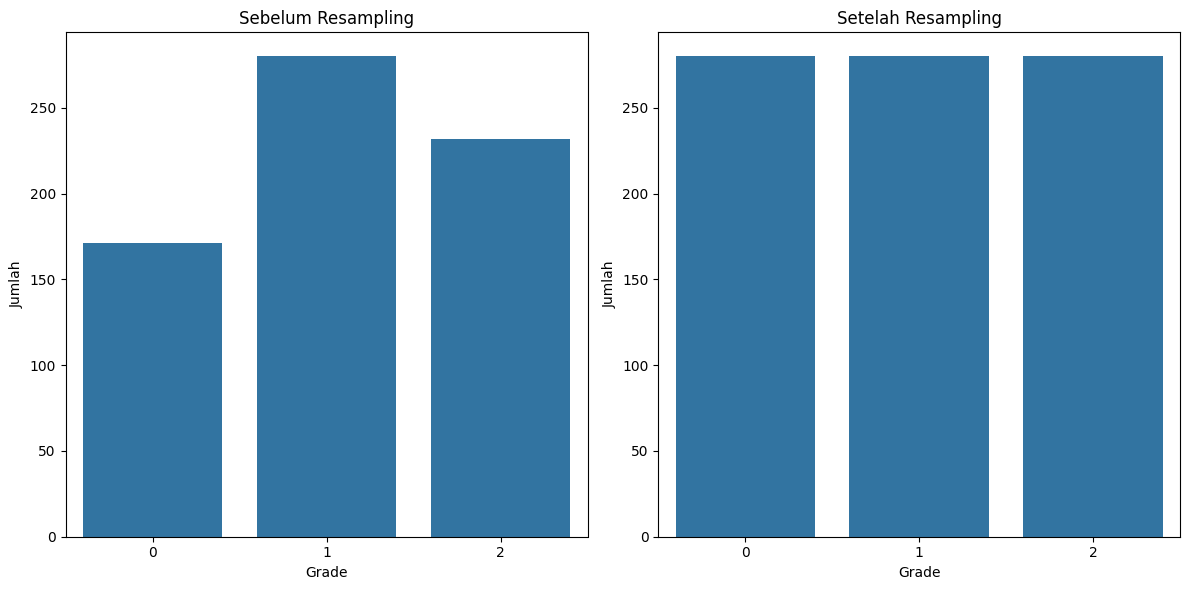

In [22]:
# Plot Sebelum Resampling
plt.figure(figsize=(12, 6))  # Mengubah ukuran figure agar lebih besar
plt.subplot(1, 2, 1)
sns.countplot(x='Grade', data=data)
plt.title('Sebelum Resampling')
plt.xlabel('Grade')
plt.ylabel('Jumlah')

# Plot Setelah Resampling
plt.subplot(1, 2, 2)
sns.countplot(x='Grade', data=df_resampled)
plt.title('Setelah Resampling')
plt.xlabel('Grade')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Scaling data

In [23]:
sc = StandardScaler()
colomn = ['pH', 'Temprature']
df_resampled[colomn] = sc.fit_transform(df_resampled[colomn])
df_resampled

,pH,Temprature,Taste,Odor,Lemak,Turbidity,Colour,Grade
0,0.187443,-1.118795,1.0,0.0,1.0,0.0,0.0,0
1,0.187443,-1.019104,0.0,1.0,0.0,1.0,3.0,0
2,1.629175,2.370393,1.0,1.0,1.0,1.0,7.0,1
3,2.387982,-1.218486,1.0,1.0,1.0,1.0,5.0,1
4,0.187443,-0.919413,0.0,0.0,0.0,0.0,5.0,2
...,...,...,...,...,...,...,...,...
835,0.415085,-0.919413,0.0,0.0,0.0,0.0,5.0,2
836,-1.330169,0.775336,0.0,0.0,0.0,1.0,4.0,2
837,1.022130,0.575953,0.0,0.0,0.0,0.0,5.0,2
838,-0.191960,-0.919413,0.0,0.0,0.0,0.0,6.0,2


In [24]:
#feature selection data and split data
x = df_resampled.drop(columns='Grade')
y = df_resampled.Grade
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (756, 7)
x_test (84, 7)


In [25]:
print(x.shape)

(840, 7)


In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 511 to 684
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          756 non-null    float64
 1   Temprature  756 non-null    float64
 2   Taste       756 non-null    float64
 3   Odor        756 non-null    float64
 4   Lemak       756 non-null    float64
 5   Turbidity   756 non-null    float64
 6   Colour      756 non-null    float64
dtypes: float64(7)
memory usage: 47.2 KB


In [27]:
dtree = DecisionTreeClassifier()
model = dtree.fit(x_train, y_train)

In [28]:
y_test

375    1
145    2
642    2
231    0
668    1
      ..
158    1
773    0
837    2
635    0
603    2
Name: Grade, Length: 84, dtype: int64

In [29]:
y_test_array = np.array(y_test)
y_test_array

array([1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2,
       2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2])

In [30]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0,
       2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2])

## Evaluasi Model

In [31]:
# Evaluasi model terbaik
print("Evaluation of the best model:")
print("Accuracy:", accuracy_score(y_test, y_pred))

Evaluation of the best model:
Accuracy: 0.8928571428571429


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.96      0.79      0.87        29
           2       0.88      0.97      0.92        30

    accuracy                           0.89        84
   macro avg       0.90      0.89      0.89        84
weighted avg       0.90      0.89      0.89        84



In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  0,  2],
       [ 4, 23,  2],
       [ 0,  1, 29]])

Text(0.5, 1.0, 'confusion matrix')

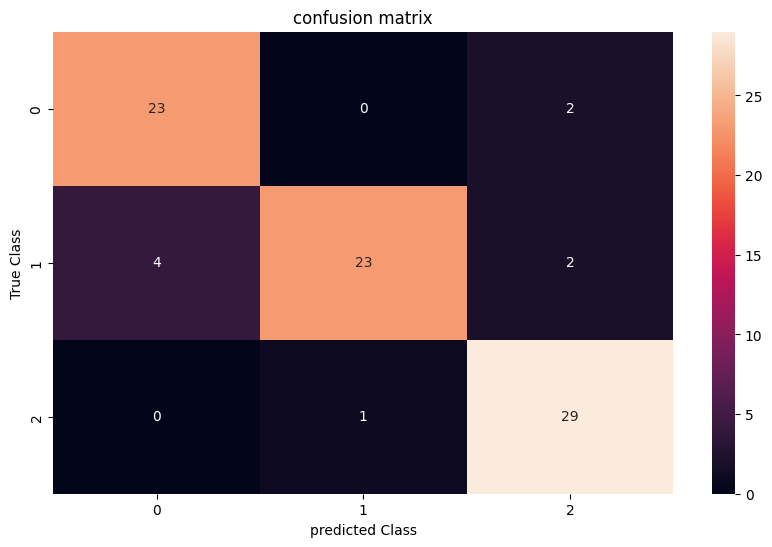

In [34]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt = 'd')

#labeling the x-axis
plt.xlabel('predicted Class')

# Labeling the Y-axis
plt.ylabel('True Class')

# Give a title to the graph
plt.title('confusion matrix')

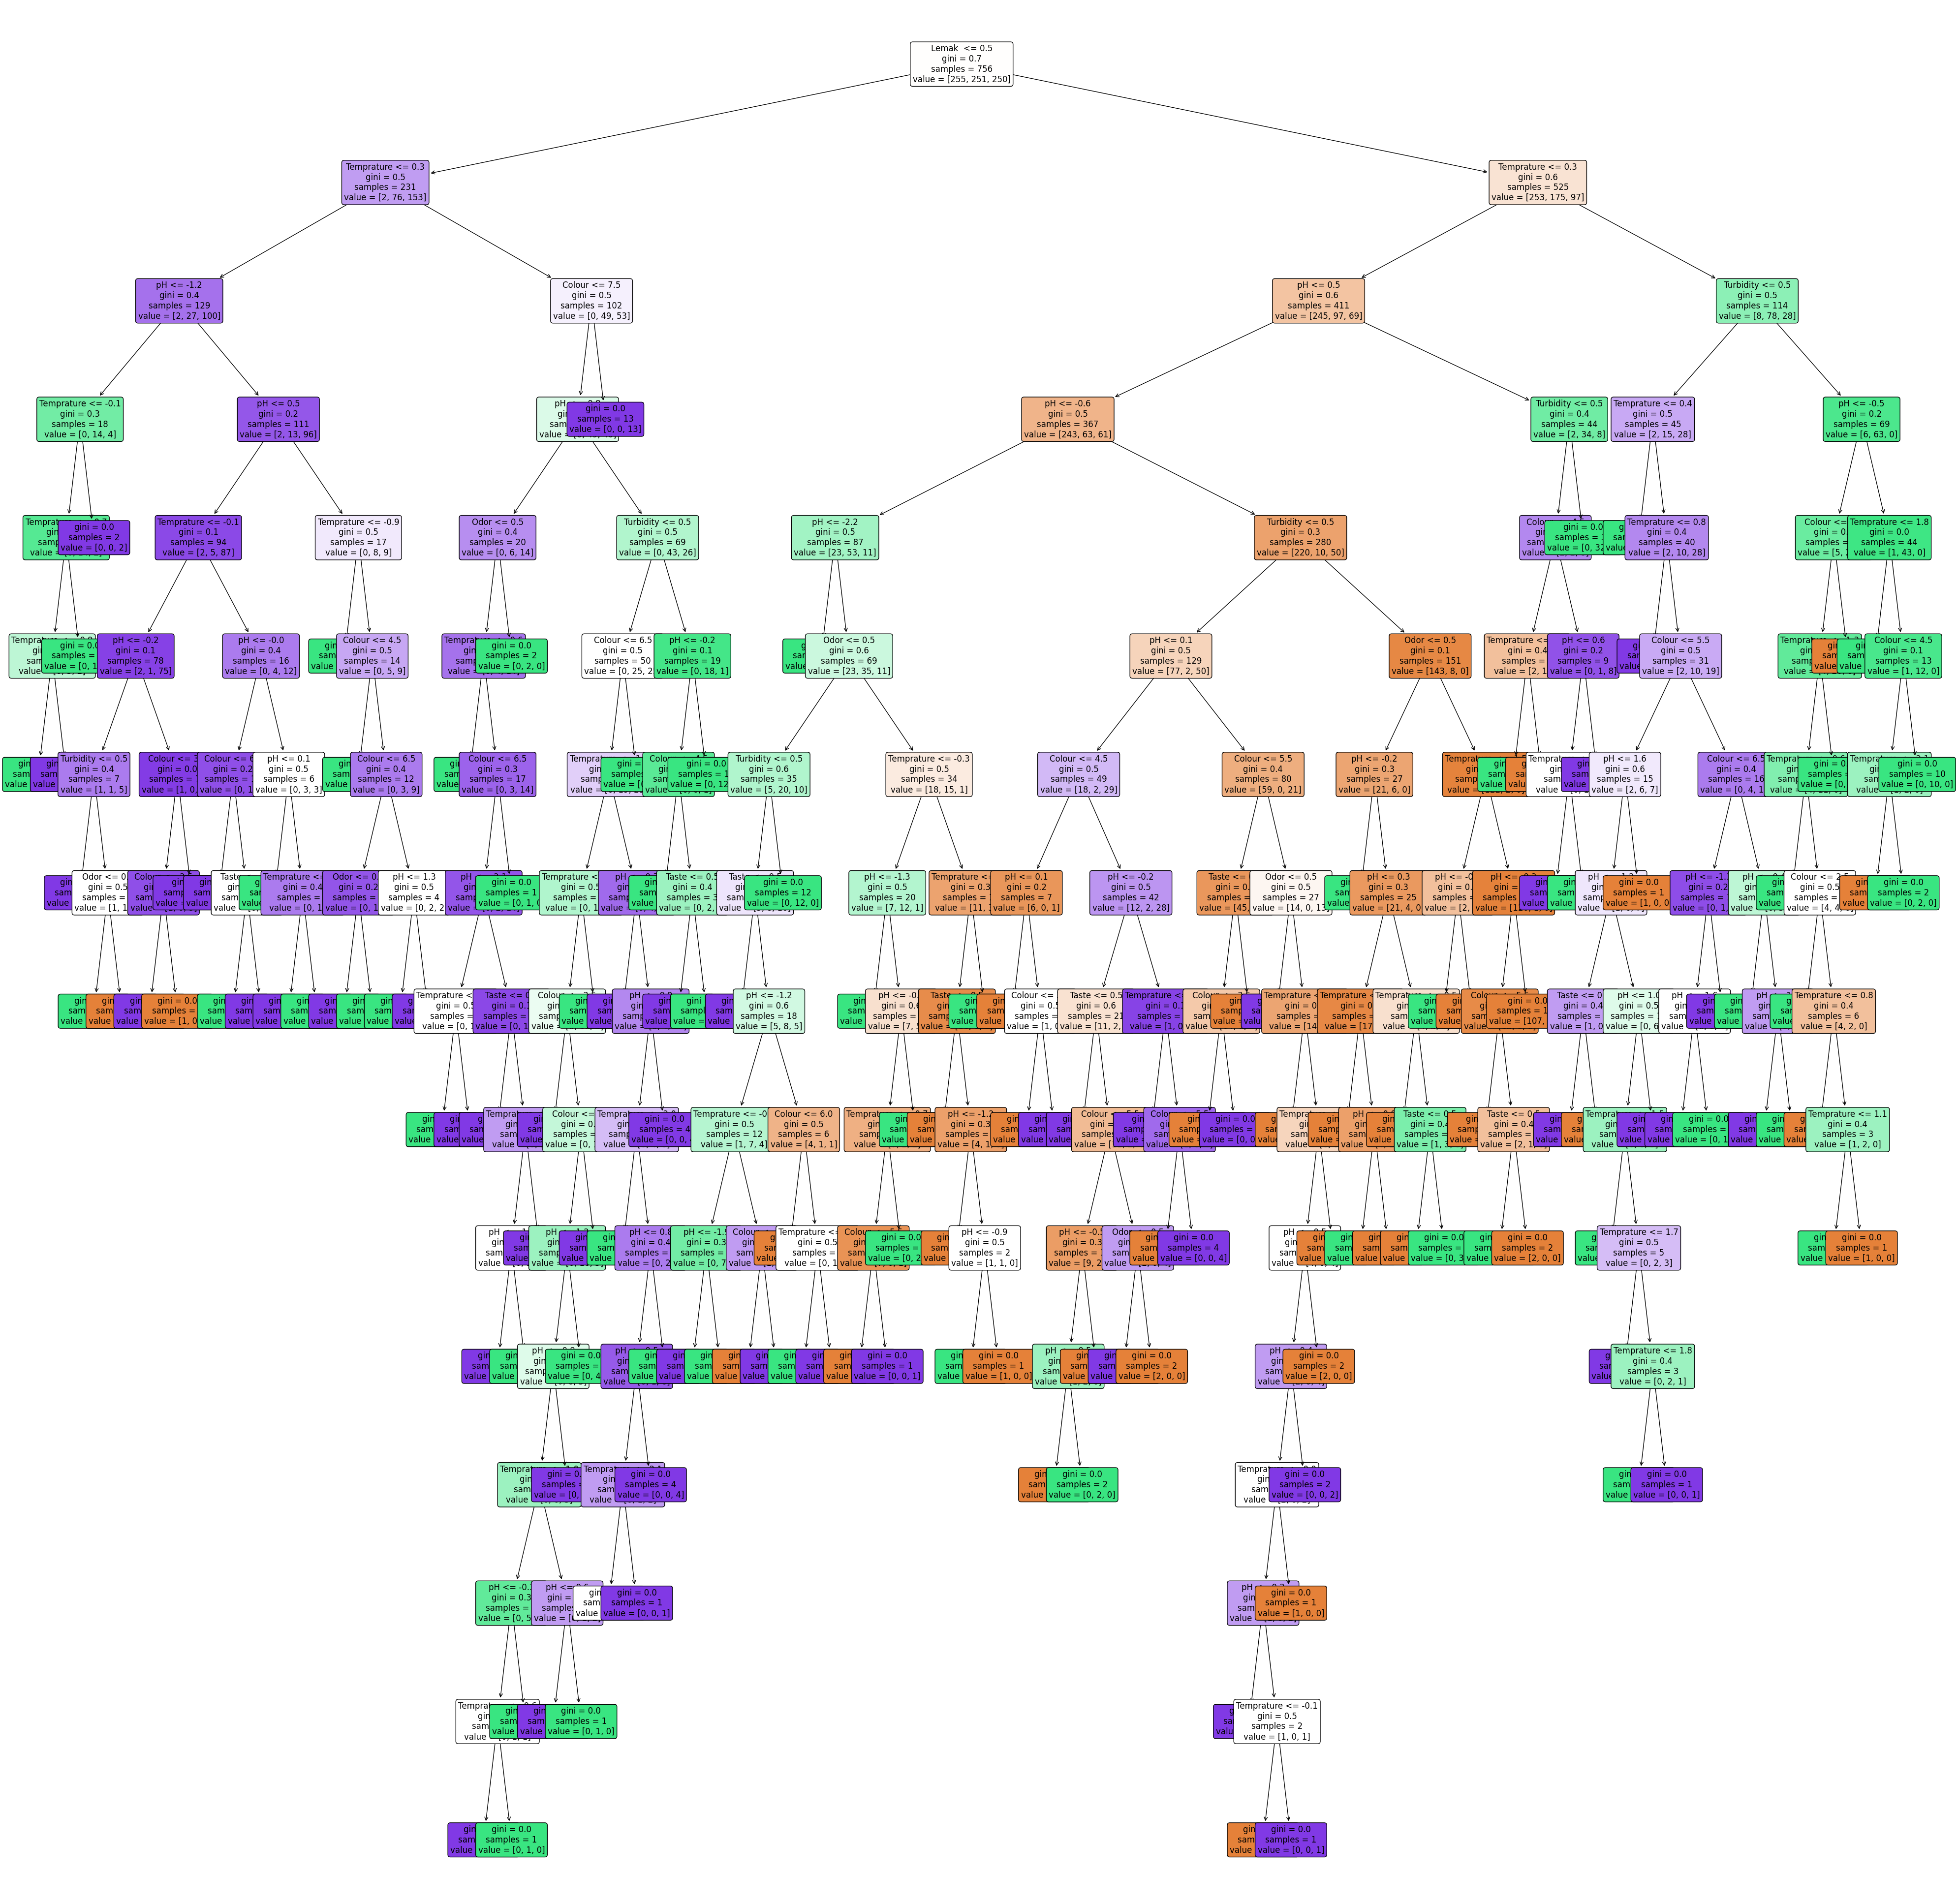

In [35]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (50,50))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df_resampled.columns,
                     filled = True ,fontsize = 12, precision = 1, rounded = True)

plt.savefig("one.jpg")

In [36]:
import pickle

In [37]:
filename = 'milkquality_model.sav'
pickle.dump(dtree, open(filename,'wb'))